# Earthquake dataset visualisation

In [4]:
# powerpoint presentation for Friday presentation, upload .ipynb file to Github
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
df1 = pd.read_csv('all_month.csv')

# Examine summary stats for df1
print(df1.info(), "\n")
print(df1.describe()"\n")
print(df1.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9064 entries, 0 to 9063
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9064 non-null   object 
 1   latitude         9064 non-null   float64
 2   longitude        9064 non-null   float64
 3   depth            9064 non-null   float64
 4   mag              9064 non-null   float64
 5   magType          9064 non-null   object 
 6   nst              7590 non-null   float64
 7   gap              7590 non-null   float64
 8   dmin             7588 non-null   float64
 9   rms              9062 non-null   float64
 10  net              9064 non-null   object 
 11  id               9064 non-null   object 
 12  updated          9064 non-null   object 
 13  place            9064 non-null   object 
 14  type             9064 non-null   object 
 15  horizontalError  6642 non-null   float64
 16  depthError       9063 non-null   float64
 17  magError      

In [9]:
# Check for type of events
print(df1['type'].unique())

# Filter for earthquakes only
earthquakes = df1[df1['type'] == 'earthquake']

['earthquake' 'quarry blast' 'explosion' 'ice quake' 'other event'
 'mine collapse']


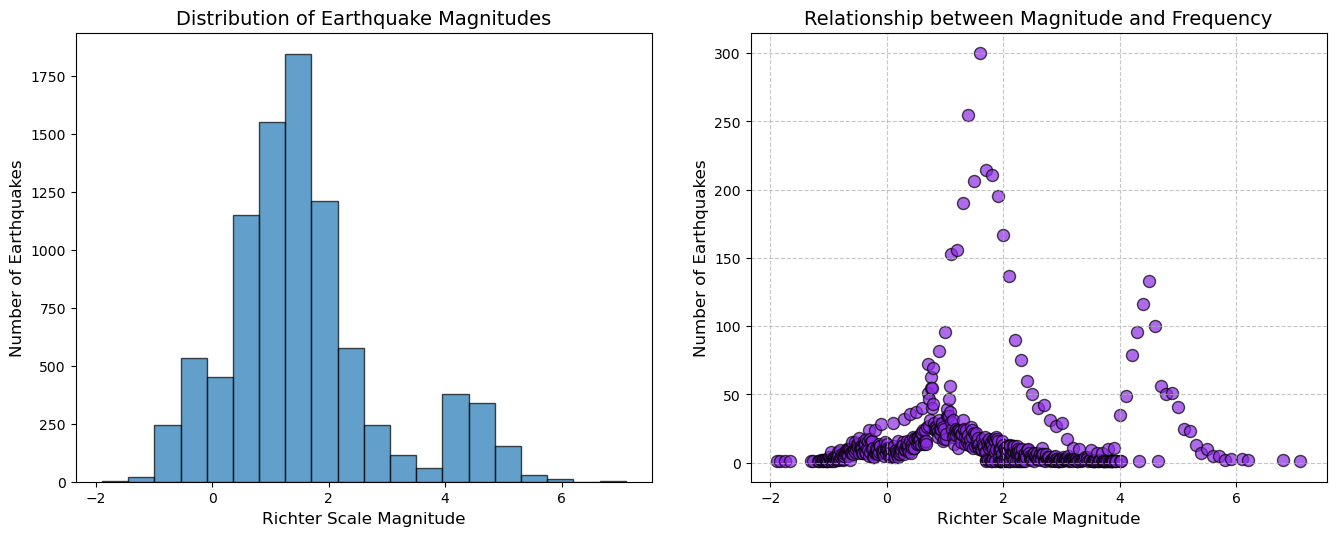

In [10]:
"""Figure 1: distribution of earthquake magnitudes, measured by Richter scale"""


# Create subplots for analysis of magnitude
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the histogram of earthquake magnitudes
ax[0].hist(earthquakes['mag'], bins=20, edgecolor='black', alpha=0.7)
ax[0].set_title('Distribution of Earthquake Magnitudes', fontsize=14)
ax[0].set_xlabel('Richter Scale Magnitude', fontsize=12)
ax[0].set_ylabel('Number of Earthquakes', fontsize=12)

# Calculate the frequency of each magnitude
magnitude_counts = earthquakes['mag'].value_counts().sort_index()

"""Figure 2: relationship between earthquake magnitude and frequency"""

# Scatter plot of magnitude vs. frequency
ax[1].scatter(magnitude_counts.index, magnitude_counts.values, color='blueviolet', s=75, edgecolor='k', alpha=0.7)
ax[1].set_title('Relationship between Magnitude and Frequency', fontsize=14)
ax[1].set_xlabel('Richter Scale Magnitude', fontsize=12)
ax[1].set_ylabel('Number of Earthquakes', fontsize=12)

# Add grid lines to the scatter plot
ax[1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout(pad=3.0)

plt.show()

hour
0     332
1     353
2     383
3     453
4     403
5     367
6     378
7     379
8     431
9     417
10    367
11    377
12    372
13    364
14    367
15    419
16    316
17    388
18    343
19    384
20    361
21    349
22    291
23    332
Name: count, dtype: int64


/tmp/ipykernel_53153/4208652491.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquakes['time'] = pd.to_datetime(earthquakes['time'])
/tmp/ipykernel_53153/4208652491.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquakes['hour'] = earthquakes['time'].dt.hour


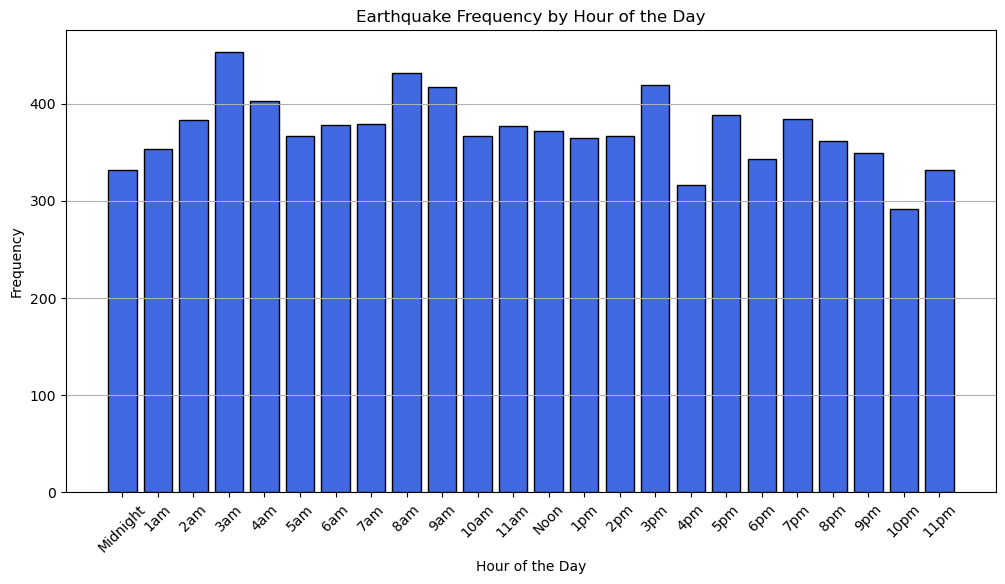

In [13]:
"""Figure 3: earthquake frequency by hour of the day"""

# Convert 'time' column to datetime object
earthquakes['time'] = pd.to_datetime(earthquakes['time'])

# Save the hour from the 'time' column
earthquakes['hour'] = earthquakes['time'].dt.hour

# Count the frequencies at each hour
freq_by_hour = earthquakes['hour'].value_counts().sort_index()

# Check data and graph correspond
print(freq_by_hour)

# Define the hour labels
hour_labels = ['Midnight', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am',
               'Noon', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']

# Plot the data using ax.bar()
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(freq_by_hour.index, freq_by_hour.values, color='royalblue', edgecolor='black')

# Set the labels
ax.set_title('Earthquake Frequency by Hour of the Day')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Frequency')

# Set the grid and x-ticks
ax.grid(True, axis='y')  # Add gridlines to the y-axis
ax.set_xticks(range(24))  # Ensure all hours are shown
ax.set_xticklabels(hour_labels, rotation=45)

# Display the plot
plt.show()

day_of_week
Monday       1102
Tuesday      1436
Wednesday    1391
Thursday     1371
Friday       1309
Saturday     1245
Sunday       1072
Name: count, dtype: int64


/tmp/ipykernel_53153/1166110183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquakes['time'] = pd.to_datetime(earthquakes['time'])
/tmp/ipykernel_53153/1166110183.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquakes['day_of_week'] = earthquakes['time'].dt.day_name()
/tmp/ipykernel_53153/1166110183.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

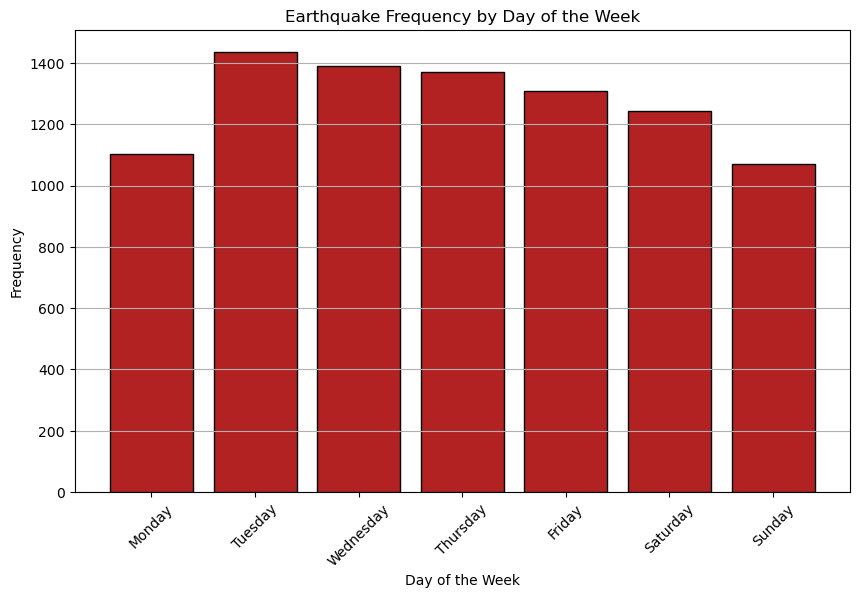

In [14]:
"""Figure 4: earthquake frequency by weekday"""

# Convert 'time' column to datetime object
earthquakes['time'] = pd.to_datetime(earthquakes['time'])

# Extract the day of the week and the hour from the 'time' column
earthquakes['day_of_week'] = earthquakes['time'].dt.day_name()
earthquakes['hour'] = earthquakes['time'].dt.hour

# Define the order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert day_of_week to a categorical type with the specified order
earthquakes['day_of_week'] = pd.Categorical(earthquakes['day_of_week'], categories=days_order, ordered=True)

# Count the occurrences of each day of the week
freq_by_weekday = earthquakes['day_of_week'].value_counts().sort_index()

# Print the values of each weekday
print(freq_by_weekday)

# Plot the data using ax.bar()
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(freq_by_weekday.index, freq_by_weekday.values, color='firebrick', edgecolor='black')

# Set the title and labels
ax.set_title('Earthquake Frequency by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')
ax.grid(True, axis='y')  # Add gridlines to the y-axis
ax.set_xticklabels(days_order, rotation=45)

plt.show()